## Kmeans Clutering and K-Nearest Neighbor Classification

### Preparation

 - Import needed packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

 - Import Data

In [2]:
f1 = []

for i, year in enumerate(list(range(2014,2019))):
    f1.append(pd.read_csv("data/%s_Data.csv"%str(year), encoding='latin-1'))
    f1[i]["year"] = year
    f1[i].columns = [x.strip() for x in f1[i].columns]

f1_df = pd.concat(f1, sort=True)
f1_df = f1_df.reset_index()

- Remove Pay drivers from our data as they do not recieve a salary for driving

In [3]:
notPayDriver = f1_df["Pay Driver?"] == 0

f1_df = f1_df[notPayDriver].copy()

- Convert Teams to Numbers

In [4]:
team_converter = {'caterham': "caterham",
                  'ferrari': "ferrari",
                  'force india': 'force india',
                  'lotus': 'lotus',
                  'marussia': 'marussia',
                  'mclaren': 'mclaren',
                  'mercedes': 'mercedes',
                  'red bull': 'red bull',
                  'sauber': 'sauber',
                  'toro rosso': 'toro rosso',
                  'williams': 'williams',
                  'manor': 'manor',
                  'mercerdes': 'mercedes',
                  'hass': 'haas',
                  'red bull/toro rosso': 'red bull/toro rosso',
                  'renault': 'renault',
                  'red bull racing': 'red bull',
                  'mclaren f1 team': 'mclaren',
                  'renault f1 team': 'renault',
                  'haas': 'haas'}

f1_df["Team"] = f1_df["Team"].apply(lambda x: team_converter[x.strip().lower()])

team_list = list(f1_df["Team"].unique())

f1_df["team_num"] = f1_df["Team"].apply(lambda x: team_list.index(x))

- Remove null values

In [5]:
for col in f1_df.columns:
    print(col, f1_df[col].isnull().sum())
    
f1_df = f1_df.fillna(0)

index 0
Age 0
Average Finish Position 0
Average Grid Position 0
Driver Name 0
Driver Status 0
Lead Lap Finish 0
Number of DNF 0
Number of DNS 0
Number of DSQ 0
Number of Fastest Laps 0
Number of Podiums 15
Number of Pole Positions 0
Number of Race Wins 0
Number of World Championships 0
Pay Driver? 0
Points 0
Rookie Status 0
Salary 0
Team 0
WD 0
year 0
team_num 0


### Kmeans Clustering

 - Perform Clustering based on salary into 4 clusters

In [6]:
X = f1_df[["Salary"]]
kmeans = KMeans(n_clusters = 4, random_state=0).fit(X)
f1_df["grouping"] = kmeans.labels_

 - Used box-plots to check the spread of various differnet clustering spreads and found four to to have the most even spreads of Salaries

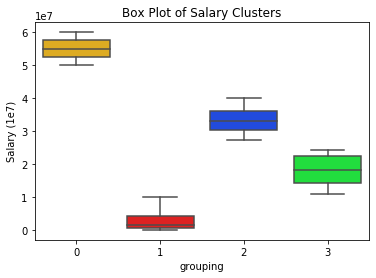

In [7]:
ax = sns.boxplot(data=f1_df[["Salary", "grouping"]].sort_values("Salary"), 
                 y="Salary", 
                 x="grouping", 
                 palette = sns.color_palette(['#fcba03', "#fc0303", "#0339fc", "#03fc28"]))
ax.set_title("Box Plot of Salary Clusters")
ax.set_ylabel("Salary (1e7)")
plt.show()

 - Visualise Clusters on a number line colouring each cluster with a different colour

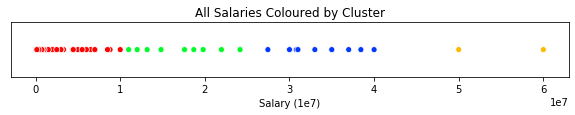

In [8]:
f1_df[["Salary", "grouping"]]
fig = plt.figure(figsize=(10,1))
ax = sns.scatterplot(x="Salary", 
                     y=np.zeros_like(f1_df["Salary"]), 
                     data=f1_df[["Salary", "grouping"]], 
                     hue="grouping", 
                     palette=sns.color_palette(['#fcba03', "#fc0303", "#0339fc", "#03fc28"]), 
                     legend=False)
ax.set_yticks([])
ax.set_title("All Salaries Coloured by Cluster")
ax.set_xlabel("Salary (1e7)")
plt.show()

### K-Nearest Neightbour Classification

 - Create Train and test data.
 - Our goal is to predict 2018 salaries so that will become out test data, therefore 2014 to 2017 will be our train data

In [9]:
train = f1_df[f1_df["year"] < 2018]
test = f1_df[f1_df["year"] == 2018]

X_headers = ['Age', 
             'Average Finish Position', 
             'Average Grid Position',
             'Driver Status', 
             'Lead Lap Finish', 
             'Number of DNF',
             'Number of DNS', 
             'Number of DSQ', 
             'Number of Fastest Laps',
             'Number of Podiums', 
             'Number of Pole Positions', 
             'Number of Race Wins',
             'Number of World Championships', 
             'Points',
             'Rookie Status', 
             'team_num', 
             'WD']

X_train = train[X_headers]
y_train = train["grouping"]

X_test = test[X_headers]
y_test = test["grouping"]

- Results of K-Nearest Neighbour Classification using all Features

In [10]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.6666666666666666


- Accuracy of K-Nearest Neighbour for each feature

In [11]:
feature_score = pd.DataFrame(columns=["Feature", "Accuracy Score"])
for feature in X_train.columns:
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train[[feature]], y_train)
    knn.score(X_test[[feature]], y_test)
    feature_score = feature_score.append({"Feature": feature, "Accuracy Score": knn.score(X_test[[feature]], y_test)}, ignore_index=True)

 - Graphing the accuracy of each variable in K-Nearest Neighbors

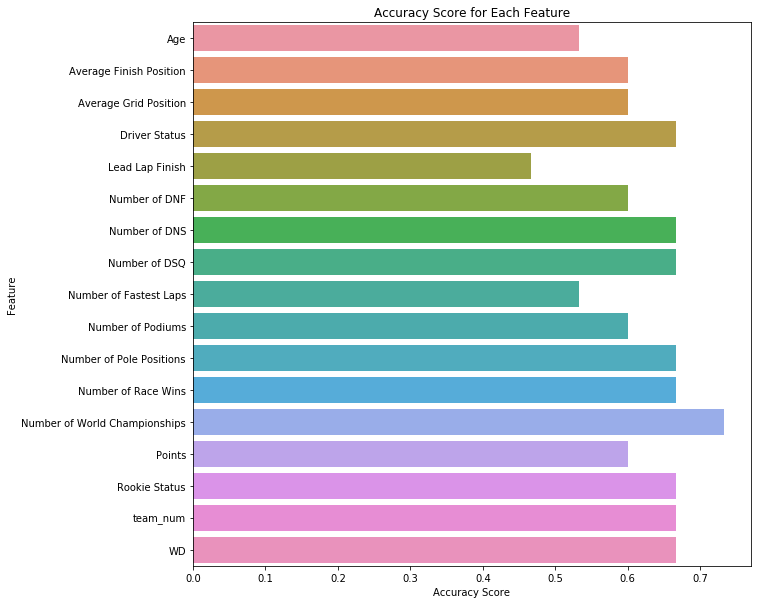

In [12]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=feature_score, 
            x="Accuracy Score", 
            y="Feature")
ax.set_title("Accuracy Score for Each Feature")
plt.show()

- K-Nearest Neighbor based on our 9 best features

In [14]:
bestFeats = list(feature_score[feature_score["Accuracy Score"] > 0.61].copy()["Feature"])

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train[bestFeats], y_train)
print(knn.score(X_test[bestFeats], y_test))

0.7333333333333333
